In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from scipy.special import erf

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
dx = 1000
dt = 1200
L = 10
tf = 20
Ti = 50
k = 10

x = np.linspace(0, L, dx)
t = np.linspace(0, tf, dt)

xv, tv = np.meshgrid(x, t)
T = Ti*erf(xv/(2*np.sqrt(k*tv)))
T[0,0] = Ti

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


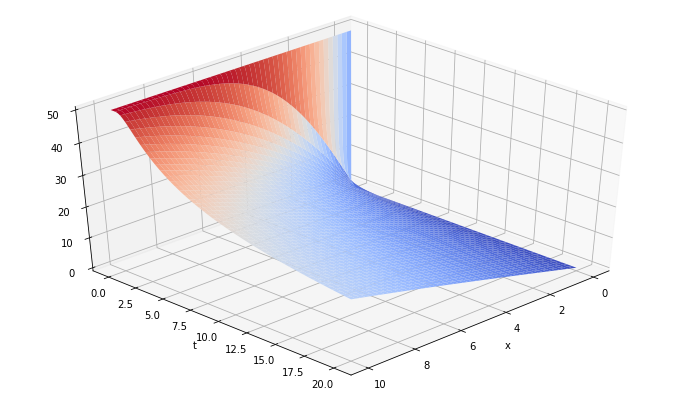

In [8]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=40, azim=45)

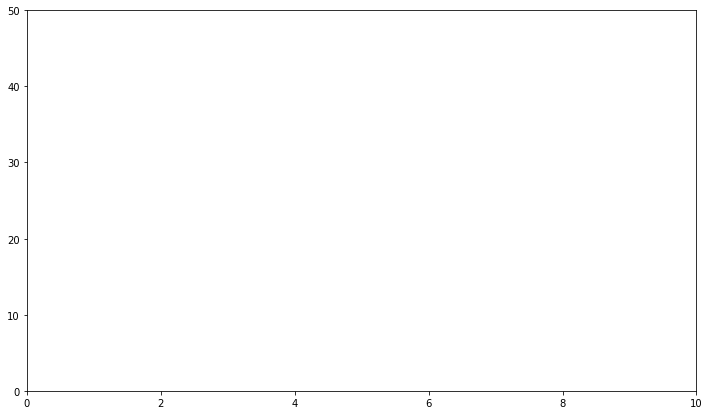

In [4]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlim((0, 10))
ax.set_ylim((0, 50))


line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    Tn = T[i, :]
    line.set_data(x, Tn)
    
    return (line,)

In [5]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
HTML(anim.to_html5_video())

In [ ]:
Writer = animation.writers['imagemagick']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
anim.save('test.gif', writer=writer)